In [1]:
from ase.io import read, write
from rascal.neighbourlist.structure_manager import mask_center_atoms_by_species

In [2]:
import seaborn as sns
from helpers import filter_by_status

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
PATH_TRAIN = "../make_tensor_data/train_tensor/CSD-3k+S546_shift_tensors_components.xyz"
PATH_TEST = "../make_tensor_data/test_tensor/CSD-500+104-7_shift_tensors_components.xyz"

In [6]:
#TODO: This as a helper function
species_shifts = {}
species_shift_tensors = {}
labels_tensor = ["XX", "YX", "ZX","XY","YY","ZY","XZ", ]
for i in zip([1,6,7,8],["1H shift","13C shift", "15N shift", "17O shift"]):
    structures_train = read(PATH_TRAIN,format="extxyz",index=":")
    structures_train = filter_by_status(structures_train)
    for structure in structures_train: mask_center_atoms_by_species(structure,species_select=[i[0]])
    shifts = np.array([tensor for structure in structures_train for tensor in structure.arrays["shape_contribution_iso"][structure.arrays["center_atoms_mask"]]])
    
    #shifts = np.array([tensor for structure in structures_train for tensor in structure.arrays["cs_tensor"][structure.arrays["center_atoms_mask"]]])
    species_shifts[i[0]] = pd.DataFrame(shifts, columns=[i[1]])
    

In [7]:
species_shifts_test = {}
species_shift_tensors = {}
labels_tensor = ["XX", "YX", "ZX","XY","YY","ZY","XZ", ]
for i in zip([1,6,7,8],["1H shift","13C shift", "15N shift", "17O shift"]):
    structures_test = read(PATH_TEST,format="extxyz",index=":")
    for structure in structures_test: mask_center_atoms_by_species(structure,species_select=[i[0]])
    shifts = np.array([tensor for structure in structures_test for tensor in structure.arrays["shape_contribution_iso"][structure.arrays["center_atoms_mask"]]])
    
    #shifts = np.array([tensor for structure in structures_train for tensor in structure.arrays["cs_tensor"][structure.arrays["center_atoms_mask"]]])
    species_shifts_test[i[0]] = pd.DataFrame(shifts, columns=[i[1]])

In [8]:
structures_train = read(PATH_TRAIN,format="extxyz",index=":")
structures_train = filter_by_status(structures_train)

In [9]:
def get_molecular_masses(structures):
    #returns np array of masses of list of ase.atoms objects
    return np.array([np.sum(structure.get_masses()) for structure in structures])

In [10]:
np.sum(structures_train[0].get_masses())

380.404

In [11]:
#explore distributions -> Unit Cell

In [12]:
structures_train[0].get_volume()

440.4976357989425

In [13]:
structures_train[0].info

{'magres_units': {'cs_tensor': 'ppm', 'cs_iso': 'ppm'},
 'STATUS': 'PASSING',
 'NAME': 'PYRIDO04',
 'ENERGY': -672.17949092}

In [18]:
shifts.shape

(43354,)

In [14]:
import pandas as pd

In [15]:
shifts_pd = pd.DataFrame(shifts, columns=["13C shift"])

In [16]:
len(structures_train[0][structures_train[0].numbers == 8])

4

In [22]:
structures_train[0].get_chemical_formula()

'C20H20N4O4'

In [17]:
from glob import glob

In [18]:
qm9_data = [read(path,format="extxyz") for path in glob("../../QM9_kaggle_dataset/xyz_QM9/*")]

In [19]:
len(qm9_data)

130831

In [20]:
len(glob("../../QM9_kaggle_dataset/qm9_exyz/*"))

130831

In [21]:
masses_qm9 = get_molecular_masses(qm9_data)

In [22]:
masses = get_molecular_masses(structures_train)
#masses 
volumes = [structure.get_volume() for structure in structures_train]
total_atoms = [len(structure) for structure in structures_train]
H_count = [len(structure[structure.numbers == 1]) for structure in structures_train]
C_count = [len(structure[structure.numbers == 6]) for structure in structures_train]
N_count = [len(structure[structure.numbers == 7]) for structure in structures_train]
O_count = [len(structure[structure.numbers == 8]) for structure in structures_train]
S_count = [len(structure[structure.numbers == 16]) for structure in structures_train]

In [23]:
masses_test = get_molecular_masses(structures_test)

In [24]:
np.average(masses_test)

969.2322294807371

In [25]:
np.average(masses)

825.685879883382

In [26]:
total_atoms_test = [len(structure) for structure in structures_test]

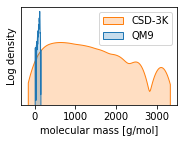

In [31]:
fig, ax = plt.subplots(figsize=(2.8,1.8))
sns.kdeplot(data=[masses_qm9,masses],fill=True,color="orange", ax=ax,common_norm=True,log_scale=(False,True))
#sns.kdeplot(data=masses_qm9,fill=True,color="blue", ax=ax,common_norm=False)
ax.set_xlabel("molecular mass [g/mol]")
ax.set_ylabel("Log density")
#ax.set_ylim(0.001,0.01)
ax.set_yticks([])
plt.legend(loc='upper right', labels=['CSD-3K','QM9'])
#plt.savefig("molecular_masses_log.png", dpi=300,bbox_inches='tight')

/ssd/scratch/kellner/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

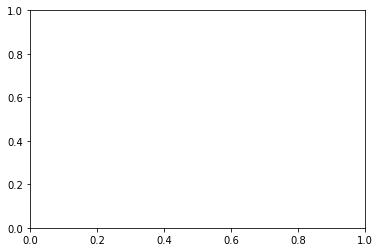

In [32]:
sns.distplot([masses,masses_qm9])

[]

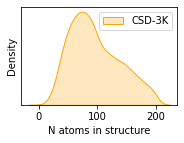

In [33]:
fig, ax = plt.subplots(figsize=(2.8,1.8))
sns.kdeplot(data=total_atoms,fill=True,color="orange", ax=ax)
ax.set_xlabel("N atoms in structure")
plt.legend(loc='upper right', labels=['CSD-3K'])
ax.set_yticks([])

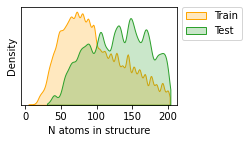

In [39]:
fig, ax = plt.subplots(figsize=(2.8,1.8))
sns.kdeplot(data=total_atoms,fill=True,color="orange", ax=ax,cut=True,bw_adjust=.3)
sns.kdeplot(data=total_atoms_test,fill=True,color="tab:green", ax=ax,cut=True,bw_adjust=.3)
ax.set_xlabel("N atoms in structure")
plt.legend(loc='upper left', labels=['Train',"Test"],
bbox_to_anchor=(1.0,1.05))
ax.set_yticks([])
plt.savefig("atoms_distribution_train_test.png",dpi=300,bbox_inches="tight")

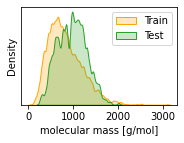

In [40]:
fig, ax = plt.subplots(figsize=(2.8,1.8))
sns.kdeplot(data=masses,fill=True,color="orange", ax=ax,bw_adjust=.3)
sns.kdeplot(data=masses_test,fill=True,color="tab:green", ax=ax,bw_adjust=.3)
ax.set_xlabel("molecular mass [g/mol]")
ax.set_yticks([])
plt.legend(loc='upper right', labels=['Train',"Test"])
plt.savefig("mass_distribution_train_test.png",dpi=300,bbox_inches="tight")

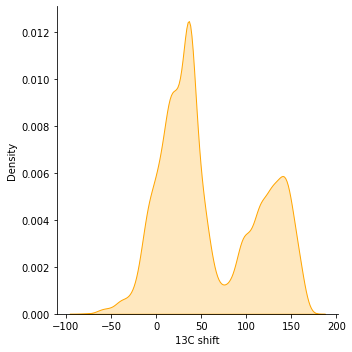

In [42]:
sns.displot(species_shifts[6], x="13C shift", kind="kde",fill=True,color="orange")


In [12]:
QM9_PATH = "../../QM9_kaggle_dataset/magnetic_shielding_tensors_train.csv"
QM9_STRUCTURES = "../../QM9_kaggle_dataset/structures_train.csv"

In [13]:
pd_QM9 = pd.read_csv(QM9_PATH)
pd_structures = pd.read_csv(QM9_STRUCTURES)

In [16]:
df = pd.concat([pd_structures, pd_QM9], axis=1)
df = df.loc[:,~df.columns.duplicated()]

In [111]:
df

,molecule_name,atom_index,atom,x,y,z,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533532,dsgdb9nsd_133884,13,H,2.582409,-1.260138,0.293499,38.9961,3.3026,-0.0001,-1.7562,26.1603,0.0000,0.0001,0.0000,24.1113
1533533,dsgdb9nsd_133884,14,H,2.087537,1.391489,0.548687,26.9291,0.6933,-0.8246,1.9653,34.1115,-4.9683,-0.7688,-5.1307,29.9158
1533534,dsgdb9nsd_133884,15,H,1.542918,0.547487,2.023550,26.9291,0.6933,0.8246,1.9654,34.1115,4.9683,0.7688,5.1307,29.9158
1533535,dsgdb9nsd_133884,16,H,-0.084531,1.110807,-1.796741,28.9460,0.0146,2.5359,-2.0440,24.9160,-1.7686,1.8798,0.9608,31.6697


In [83]:
tensors_QM9.shape

(541140, 9)

In [85]:
np.linalg.eig(tensors_QM9[0].reshape(3,3).T)

(array([195.314695  , 195.31629646, 195.31770854]),
 array([[-0.99864855,  0.0471778 , -0.02180212],
        [ 0.01452426,  0.656126  ,  0.75451157],
        [-0.04990113, -0.75317523,  0.6559245 ]]))

In [44]:
np.average(tensors_QM9[:,0::4],axis=1).shape

(541140,)

In [10]:
pd_QM9.shape

(1533537, 11)

In [ ]:
for elem in ["H",""]

In [80]:
np.average(np.array(df[df["atom"]=="H"].iloc[:, 6:])[:,0::4],axis=1)

array([31.46056667, 31.46056667, 31.46063333, ..., 30.3188    ,
       28.51056667, 30.04923333])

In [81]:
(31.3410 + 28.9546 + 34.0861)/3

31.460566666666665

In [71]:
df[df["atom"]=="H"].iloc[:, 6:]

,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013
6,31.2593,5.6126,-2.1025,5.6136,37.4364,-3.5567,-2.4461,-4.1372,27.9884
...,...,...,...,...,...,...,...,...,...
1533532,38.9961,3.3026,-0.0001,-1.7562,26.1603,0.0000,0.0001,0.0000,24.1113
1533533,26.9291,0.6933,-0.8246,1.9653,34.1115,-4.9683,-0.7688,-5.1307,29.9158
1533534,26.9291,0.6933,0.8246,1.9654,34.1115,4.9683,0.7688,5.1307,29.9158
1533535,28.9460,0.0146,2.5359,-2.0440,24.9160,-1.7686,1.8798,0.9608,31.6697


In [30]:


tensors_QM9 = np.array(df[df["atom"]=="C"].iloc[:, 6:])

In [31]:
tensors_QM9.shape

(541140, 9)

In [37]:
isos = np.sum(tensors_QM9[:,0::3])

In [32]:
isos_QM9 = []
for tensor in tensors_QM9:
        iso_shift = np.sum(np.linalg.eig(tensor.reshape((3,3)))[0])/3
        isos_QM9.append(iso_shift)
isos_QM9 = np.array(isos_QM9)

In [45]:
isos_QM9 = np.average(tensors_QM9[:,0::4],axis=1)

In [47]:
isos_QM9_C = pd.DataFrame(isos_QM9, columns=["13C shift"])

In [49]:
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='13C shift', ylabel='Density'>

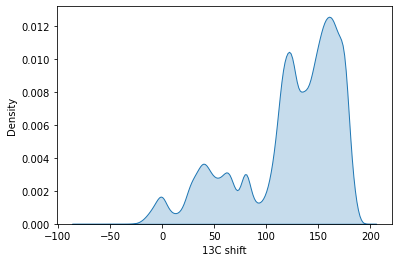

In [56]:
sns.kdeplot(data=isos_QM9_C, x="13C shift",fill=True)

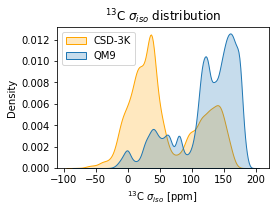

In [66]:
fig, ax = plt.subplots(figsize=(3.8,2.6))
sns.kdeplot(data=species_shifts[6], x="13C shift",fill=True,color="orange", ax=ax)
sns.kdeplot(data=isos_QM9_C, x="13C shift", fill=True,ax=ax)
#ax.set_title("")
ax.set_xlabel(r"$^{13}$C $\sigma_{iso}$ [ppm]")
ax.set_title(r"$^{13}$C $\sigma_{iso}$ distribution")
plt.legend(loc='upper left', labels=['CSD-3K', 'QM9'])
#plt.savefig("QM9_CSD3K_C13_iso.png", dpi=300,bbox_inches='tight')

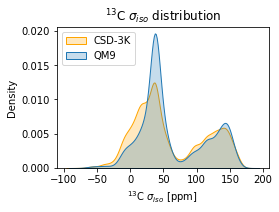

In [52]:
fig, ax = plt.subplots(figsize=(3.8,2.6))
sns.kdeplot(data=species_shifts[6], x="13C shift",fill=True,color="orange", ax=ax)
sns.kdeplot(data=species_shifts_test[6], x="13C shift", fill=True,ax=ax)
#ax.set_title("")
ax.set_xlabel(r"$^{13}$C $\sigma_{iso}$ [ppm]")
ax.set_title(r"$^{13}$C $\sigma_{iso}$ distribution")
plt.legend(loc='upper left', labels=['CSD-3K', ''])

In [ ]:
fig, ax = plt.subplots(figsize=(2.8,1.8))
sns.kdeplot(data=total_atoms,fill=True,color="orange", ax=ax)
sns.kdeplot(data=total_atoms_test,fill=True,color="tab:green", ax=ax)
ax.set_xlabel("N atoms in structure")
plt.legend(loc='upper left', labels=['Train',"Test"],
bbox_to_anchor=(1.0,1.05))
ax.set_yticks([])
plt.savefig("atoms_distribution_train_test.png",dpi=300,bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(figsize=(3.8,2.6))
sns.kdeplot(data=species_shifts[7], x="13C shift",fill=True,color="orange", ax=ax)
sns.kdeplot(data=isos_QM9_C, x="13C shift", fill=True,ax=ax)
#ax.set_title("")
ax.set_xlabel(r"$^{13}$C $\sigma_{iso}$ [ppm]")
ax.set_title(r"$^{13}$C $\sigma_{iso}$ distribution")
plt.legend(loc='upper left', labels=['train', 'test'])

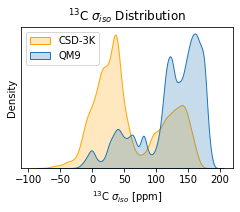

In [143]:
fig, ax = plt.subplots(figsize=(3.8,2.6))
sns.kdeplot(data=species_shifts[6], x="13C shift",fill=True,color="orange", ax=ax)
sns.kdeplot(data=np.average(np.array(df[df["atom"]=="C"].iloc[:, 6:])[:,0::4],axis=1), fill=True,ax=ax)
#ax.set_xlim(-400,300)
ax.set_xlabel(r"$^{13}$C $\sigma_{iso}$ [ppm]")
ax.set_title(r"$^{13}$C $\sigma_{iso}$ Distribution")
ax.set_yticks([])
#plt.axis('off')
plt.legend(loc='upper left', labels=['CSD-3K', 'QM9'])
#plt.savefig("QM9_CSD3K_C13_iso.png", dpi=300,bbox_inches='tight')

In [80]:
species_shifts[6].to_numpy()

array([[  3.99],
       [  3.99],
       [  3.99],
       ...,
       [134.16],
       [134.16],
       [134.16]])

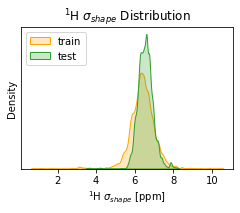

In [95]:
fig, ax = plt.subplots(figsize=(3.8,2.6))
a = list(species_shifts[1].to_numpy().flatten())
b = list(species_shifts_test[1].to_numpy().flatten())

sns.kdeplot(data=a,fill=True,color="orange", ax=ax)
sns.kdeplot(data=b,fill=True,color="tab:green",ax=ax)
#ax.set_xlim(-400,300)
ax.set_xlabel(r"$^{1}$H $\sigma_{shape}$ [ppm]")
ax.set_title(r"$^{1}$H $\sigma_{shape}$ Distribution")
ax.set_yticks([])
#plt.axis('off')
plt.legend(loc='upper left', labels=['train', 'test'])
#plt.savefig("train_test_H1_iso.png", dpi=300,bbox_inches='tight')

In [86]:
a

[array([3.99]),
 array([3.99]),
 array([3.99]),
 array([3.99]),
 array([43.06]),
 array([43.06]),
 array([43.06]),
 array([43.06]),
 array([22.7]),
 array([22.7]),
 array([22.7]),
 array([22.7]),
 array([58.12]),
 array([58.12]),
 array([58.12]),
 array([58.12]),
 array([27.33]),
 array([27.33]),
 array([27.33]),
 array([27.33]),
 array([13.46]),
 array([13.46]),
 array([4.61]),
 array([4.61]),
 array([86.77]),
 array([86.77]),
 array([9.5]),
 array([9.5]),
 array([15.33]),
 array([15.33]),
 array([137.13]),
 array([137.13]),
 array([128.37]),
 array([128.37]),
 array([141.57]),
 array([141.57]),
 array([142.87]),
 array([142.87]),
 array([21.82]),
 array([21.83]),
 array([21.82]),
 array([21.83]),
 array([10.07]),
 array([10.07]),
 array([10.07]),
 array([10.07]),
 array([10.63]),
 array([10.63]),
 array([10.63]),
 array([10.63]),
 array([21.49]),
 array([21.49]),
 array([21.49]),
 array([21.49]),
 array([97.42]),
 array([97.43]),
 array([97.42]),
 array([97.43]),
 array([11.79]),
 ar

In [83]:
type(total_atoms)

list

[]

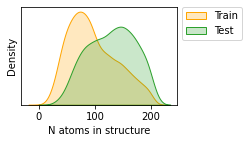

In [79]:
fig, ax = plt.subplots(figsize=(2.8,1.8))
sns.kdeplot(data=total_atoms,fill=True,color="orange", ax=ax)
sns.kdeplot(data=total_atoms_test,fill=True,color="tab:green", ax=ax)
ax.set_xlabel("N atoms in structure")
plt.legend(loc='upper left', labels=['Train',"Test"],
bbox_to_anchor=(1.0,1.05))
ax.set_yticks([])
#plt.savefig("atoms_distribution_train_test.png",dpi=300,bbox_inches="tight")

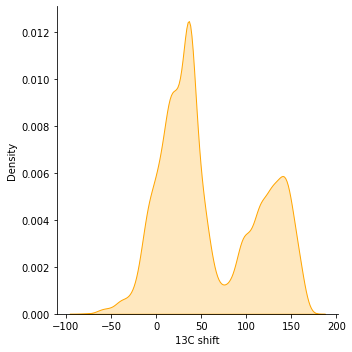

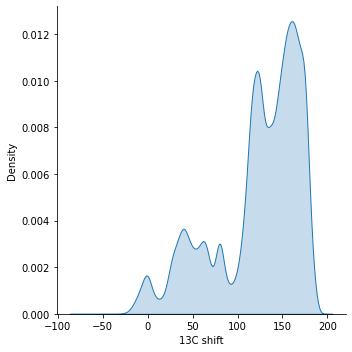

In [48]:
sns.displot(species_shifts[6], x="13C shift", kind="kde",fill=True,color="orange")
sns.displot(isos_QM9_C, x="13C shift", kind="kde",fill=True)

<AxesSubplot:ylabel='Density'>

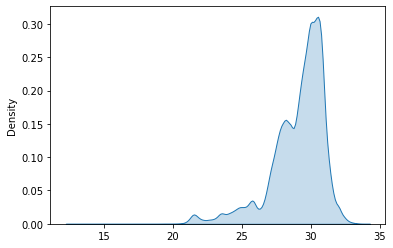

In [79]:
sns.kdeplot(data=np.average(np.array(df[df["atom"]=="H"].iloc[:, 6:])[:,0::4],axis=1),fill=True)

In [1]:
import joblib

In [2]:
joblib.__version__

'1.1.0'

In [3]:
import rascal

In [4]:
rascal.__version__

'0.0.0'

In [5]:
import sklearn

In [6]:
sklearn.__version__

'1.0.2'